


<img src="images/ProjectPythia_Logo_Final-01-Blue.svg" width=250 alt="Project Pythia Logo"></img>

# How to Create an Interactive Air Quality Map with the EPA's Air Quality System (AQS) API

---

## Overview
Create a map that can be interacted with using the Holoviz ecosystem, and incorparate air quality data from the EPA into it.

In this notebook, it will cover:

1. Opening the GeoViews package that includes the Holoviz ecosystem.
1. Opening EPA data.
1. Add data from the EPA onto the map.
1. Build the interactive air quality map.



## Prerequisites


| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Necessary | |
| [Intro to Pandas ](https://foundations.projectpythia.org/core/pandas/pandas.html) | Necessary | | 
| Notebook 1 | Necessary | |
| Geoviews | Necessary | |



- **Time to learn**: 30 minutes

- **System Requirements**: 
    - If notebook 1 steps are not completed, please complete them first.


---

## Imports

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import numpy as np
import pandas as pd
import geoviews as gv
import geoviews.feature as gf
from geoviews import opts
import geoviews.tile_sources as gts
from cartopy import crs as ccrs
import pyaqsapi as aqs

--- 

## Accessing Data from the AQS

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Important:</p>
    Make sure that you have an account with AQS before proceeding. If you already have an account, you may skip the first line. 
    If not completed, access to the data will be challanging. 
</div>

In [18]:
aqs.aqs_sign_up('EMAIL')

A verification email will be sent to EMAIL EMAIL


In [19]:
#This line is if you already created an account. Make sure you add your username and key into the line and for the line above, add 'EMAIL'.
username = ''
key = ''

In [20]:
#Put your own username and key in!
aqs.aqs_credentials(username=username, key=key)

---

## Checking the Format of the Data from the EPA

For this part of the notebook, it will explore the format of the data that we are calling from the EPA. In this notebook, we will be looking at Los Angeles, California. 

To begin, lets get the code for California. (CA = 06)

In [21]:
aqs.aqs_states()

,code,value_represented
0,01,Alabama
1,02,Alaska
2,04,Arizona
3,05,Arkansas
4,06,California
5,08,Colorado
6,09,Connecticut
7,10,Delaware
8,11,District Of Columbia
9,12,Florida


In [22]:
states = aqs.aqs_states()
CA = 6

Now, lets add the parameter codes of data that we can add to the map, specify the time we want to look at, and check the format of the data.

Parameter codes can be accessed from the [EPA website](https://aqs.epa.gov/aqsweb/documents/codetables/parameters.html). 

In [23]:
now = datetime.today()
year = now.year
month = now.month 
day = now.day
print(year, month, day)

2023 12 12


For this example, it will look at Carbon Monoxide (CO). 
The parameter for CO is 42101.

In [24]:
CO = 42101

The date is in UTC, and the AQS data does not have data that is real-time, we will have to subtract the date by one day. 

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
   You might have to check if there is CO data for this area.
</div>

In [ ]:
co = aqs.bystate.sampledata(parameter= CO, bdate = date(year=year-1, month=month, day = day-1), edate = date(year=year-1, month=month, day = day), stateFIPS = '06')

In [26]:
co

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,...,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code
0,06,067,0015,42101,1,38.593322,-121.503795,WGS84,Carbon monoxide,2022-12-11,...,0.02,None,BA - Maintenance/Routine Repairs.,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,California,Sacramento,2023-07-06,40900
1,06,067,0015,42101,1,38.593322,-121.503795,WGS84,Carbon monoxide,2022-12-11,...,0.02,None,BA - Maintenance/Routine Repairs.,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,California,Sacramento,2023-07-06,40900
2,06,067,0015,42101,1,38.593322,-121.503795,WGS84,Carbon monoxide,2022-12-11,...,0.02,None,BA - Maintenance/Routine Repairs.,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,California,Sacramento,2023-07-06,40900
3,06,067,0015,42101,1,38.593322,-121.503795,WGS84,Carbon monoxide,2022-12-11,...,0.02,None,BA - Maintenance/Routine Repairs.,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,California,Sacramento,2023-07-06,40900
4,06,067,0015,42101,1,38.593322,-121.503795,WGS84,Carbon monoxide,2022-12-11,...,0.02,None,BA - Maintenance/Routine Repairs.,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,California,Sacramento,2023-07-06,40900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,06,059,0008,42101,1,33.819305,-117.918759,WGS84,Carbon monoxide,2022-12-12,...,0.02,None,None,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,California,Orange,2023-03-03,31080
2492,06,059,0008,42101,1,33.819305,-117.918759,WGS84,Carbon monoxide,2022-12-12,...,0.02,None,None,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,California,Orange,2023-03-03,31080
2493,06,059,0008,42101,1,33.819305,-117.918759,WGS84,Carbon monoxide,2022-12-12,...,0.02,None,None,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,California,Orange,2023-03-03,31080
2494,06,059,0008,42101,1,33.819305,-117.918759,WGS84,Carbon monoxide,2022-12-12,...,0.02,None,None,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,California,Orange,2023-03-03,31080


Check the columns for California next!

In [27]:
co.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'date_local',
       'time_local', 'date_gmt', 'time_gmt', 'sample_measurement',
       'units_of_measure', 'units_of_measure_code', 'sample_duration',
       'sample_duration_code', 'sample_frequency', 'detection_limit',
       'uncertainty', 'qualifier', 'method_type', 'method', 'method_code',
       'state', 'county', 'date_of_last_change', 'cbsa_code'],
      dtype='object')

Set up the timeframe

In [28]:
start = 1
end = 30 

In [29]:
co = aqs.bystate.sampledata(parameter= CO, bdate = date(year=year-1, month=month, day = start), edate = date(year=year-1, month=month, day = end), stateFIPS = '06')

Just like in Notebook 1, take a check at the plotting data in its original format. 

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note</p>
   The time is in UTC format
</div>

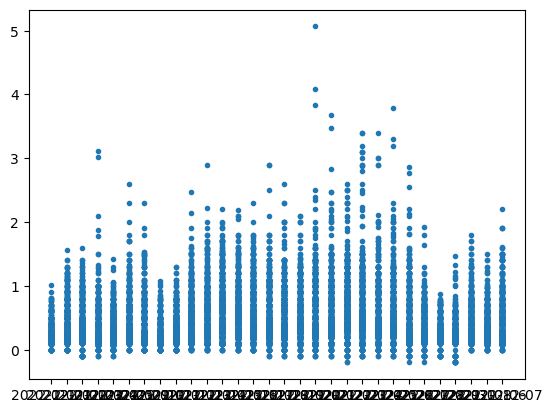

In [30]:
plt.plot(co['date_local'], co['sample_measurement'], '.')

---

#### Prepare the Data for Visualization

Lets look at Los Angeles County.

In [32]:
coca = co.loc[co['county'] == 'Los Angeles', ['date_local', 'time_local', 'sample_measurement', 'units_of_measure', 'site_number', 'latitude', 'longitude']]

In [33]:
coca

,date_local,time_local,sample_measurement,units_of_measure,site_number,latitude,longitude
4221,2022-12-01,00:00,0.2,Parts per million,1103,34.066590,-118.22688
4222,2022-12-01,01:00,0.2,Parts per million,1103,34.066590,-118.22688
4223,2022-12-01,02:00,0.2,Parts per million,1103,34.066590,-118.22688
4224,2022-12-01,03:00,0.2,Parts per million,1103,34.066590,-118.22688
4225,2022-12-01,04:00,0.2,Parts per million,1103,34.066590,-118.22688
...,...,...,...,...,...,...,...
37435,2022-12-30,19:00,0.3,Parts per million,1302,33.901389,-118.20500
37436,2022-12-30,20:00,0.2,Parts per million,1302,33.901389,-118.20500
37437,2022-12-30,21:00,0.2,Parts per million,1302,33.901389,-118.20500
37438,2022-12-30,22:00,0.2,Parts per million,1302,33.901389,-118.20500


Just like in notebook 1, lets make sure the data frame for California is chronological order. 

In [34]:
coca['datetime'] = pd.to_datetime(coca['date_local'] + ' ' + coca['time_local'])
coca = coca.sort_values(by='datetime')

This data will look at carbon dioxide levels from December of 2022.

In [35]:
coca.datetime

4221    2022-12-01 00:00:00
31229   2022-12-01 00:00:00
31018   2022-12-01 00:00:00
22455   2022-12-01 00:00:00
16547   2022-12-01 00:00:00
                ...        
32523   2022-12-30 23:00:00
32944   2022-12-30 23:00:00
8331    2022-12-30 23:00:00
19466   2022-12-30 23:00:00
37439   2022-12-30 23:00:00
Name: datetime, Length: 6480, dtype: datetime64[ns]

---

## Creating the Interactive Map
It is now time to create the map. To start off, the Holoviz Ecosystem should be opened up. 

#### Opening the Holoviz Ecosystem

To open the Holoviz ecosystem, you need to type in the line:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
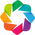

In [36]:
gv.extension('bokeh', 'matplotlib')

Once you have opened the Holoviz Ecosystem, now you can go foward and add in data from the EPA using Pandas.


In [40]:
coca

,date_local,time_local,sample_measurement,units_of_measure,site_number,latitude,longitude,datetime
4221,2022-12-01,00:00,0.200,Parts per million,1103,34.066590,-118.22688,2022-12-01 00:00:00
31229,2022-12-01,00:00,0.212,Parts per million,1103,34.066590,-118.22688,2022-12-01 00:00:00
31018,2022-12-01,00:00,0.200,Parts per million,0016,34.144350,-117.85036,2022-12-01 00:00:00
22455,2022-12-01,00:00,0.100,Parts per million,6012,34.383440,-118.52840,2022-12-01 00:00:00
16547,2022-12-01,00:00,0.200,Parts per million,1201,34.199250,-118.53276,2022-12-01 00:00:00
...,...,...,...,...,...,...,...,...
32523,2022-12-30,23:00,0.200,Parts per million,0016,34.144350,-117.85036,2022-12-30 23:00:00
32944,2022-12-30,23:00,0.311,Parts per million,1103,34.066590,-118.22688,2022-12-30 23:00:00
8331,2022-12-30,23:00,0.300,Parts per million,1701,34.067030,-117.75140,2022-12-30 23:00:00
19466,2022-12-30,23:00,0.200,Parts per million,1201,34.199250,-118.53276,2022-12-30 23:00:00


## Create sets of GeoViews points

For the next line, I would use the names of the columns that the previous section went into. 

In [51]:
coca_points = gv.Points(coca, ['longitude','latitude'],['date_local','time_local','sample_measurement','units_of_measure','site_number', 'datetime'])

In [52]:
coca_points

:Points   [longitude,latitude]   (date_local,time_local,sample_measurement,units_of_measure,site_number,datetime)

In [ ]:
#lonW = '-130'
#lonE = '-62'
#latS = '20'
#latN = '55'

## Geo-reference the Image with a Raster Image

In [50]:
(gv.tile_sources.OSM * coca_points).opts(
    opts.Points(frame_width=800, frame_height=600, size=8, color='TMPC',tools=['hover']))

bokeh backend could not plot any Elements in the Overlay.

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (date_local,time_local,sample_measurement,units_of_measure,site_number,datetime)

- - - 

## Summary

* The Holoviz ecosystem helps with visualizing air quality data from the EPA, as well as making it interactive.


## References

1. Notebook 1
1. [Holoviz](https://holoviz.org)
1. [Geoviews](https://geoviews.org)
1. 02_Geoviews_WorldMETAR.ipymb notebook (Week 10)



----

Author: Samantha DeSousa